# Final Project Submission

Please fill out:
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


# Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/districtmap09122014.jpg" width=800>

# OSEMN Model

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    <br><br>
6. **HOLDOUT VALIDATION**
___

### **The variables in the data set:**

- Fiscal Year Released Fiscal year (year ending June 30) for which the offender was released from prison.

- Recidivism Reporting Year 
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- Race - Ethnicity 
    - Offender's Race and Ethnicity

- Convicting Offense Classification 
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- Convicting Offense Type General category for the most serious offense for which the offender was placed in prison.

- Convicting Offense Subtype 
    - Further classification of the most serious offense for which the offender was placed in prison.

- Release Type 
    - Reasoning for Offender's release from prison.

- Main Supervising District 
    - The Judicial District supervising the offender for the longest time during the tracking period.

- Recidivism - Return to Prison 
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period

- Days to Recidivism 
    - Number of days it took before the offender returned to prison.

- New Conviction Offense Classification The same as the initial offense classification.

- New Conviction Offense Type The same as the initial offense type.

- New Conviction Offense Sub Type The same as the initial offense subtype.

- Part of Target Population 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# Importing Packages and Loading in the Dataset

In [1]:
# Import custom python package BroadSteel DataScience (bs_ds_)
from bs_ds.imports import *
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric, big_pandas, ignore_warnings

View our documentation at https://bs-ds.readthedocs.io/en/latest/bs_ds.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


In [2]:
# Enabling full-sized dataframes and info rows
big_pandas()

# Turning off warnings for function deprecations
ignore_warnings()

# Defining colorscheme for notebook
plt.style.use('dark_background')

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.precision=4


In [3]:
# Dataset Links
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [4]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [5]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

Removed New.
Removed Days.
Removed Recidivism Type.


### Save original names vs short names in column_legend
- then map names onto columns

In [6]:
print(df.columns)

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')


In [7]:
# New short-hand names to use
colnames_short = ('yr_released','report_year','race_ethnicity',
                  'age_released','crime_class','crime_type',
                  'crime_subtype','release_type','super_dist',
                  'recidivist','target_pop','sex')

# Zipping the original and new into a renaming dictionary
column_legend = dict(zip(df.columns,colnames_short))
# Rename df with shorter names
df.rename(mapper=column_legend, axis=1, inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


## EDA with Pandas_Profiling

In [8]:
import pandas_profiling as pp

In [9]:
pp.ProfileReport(df)

Number of variables,12
Number of observations,26020
Total Missing (%),3.6%
Total size in memory,2.4 MiB
Average record size in memory,96.0 B
Numeric,1
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## ADDRESSING NULL VALUES

In [10]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
report_year,0,26020,0.000
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0.000
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
release_type,1762,26020,6.772
super_dist,9581,26020,36.822


**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_released, race_ethnicity, and release_type.**

In [11]:
# Filling NA's in super_dist and release_type
df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)
df['super_dist'].fillna("unknown", inplace=True)
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0.0
report_year,0,24225,0.0
race_ethnicity,0,24225,0.0
age_released,0,24225,0.0
crime_class,0,24225,0.0
crime_type,0,24225,0.0
crime_subtype,0,24225,0.0
release_type,0,24225,0.0
super_dist,0,24225,0.0


___
## COMBINING AND REMAPPING CLASSES

### df['race_ethnicity']

In [12]:
check_unique(df,['race_ethnicity'])


---------------------------

race_ethnicity Type: object
Number unique values: 11.


,race_ethnicity
White - Non-Hispanic,16460
Black - Non-Hispanic,5687
White - Hispanic,1365
American Indian or Alaska Native - Non-Hispanic,463
Asian or Pacific Islander - Non-Hispanic,175
Black - Hispanic,36
American Indian or Alaska Native - Hispanic,19
White -,12
Asian or Pacific Islander - Hispanic,5
Black -,2


- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [13]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)

In [14]:
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White,25-34,D Felony,Property,Theft,Discharged – End of Sentence,unknown,Yes,No,Male
2,2010,2013,White,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,unknown,Yes,No,Male


In [15]:
check_unique(df,['race_ethnicity'])


---------------------------

race_ethnicity Type: object
Number unique values: 5.


,race_ethnicity
White,16472
Black,5725
Hispanic,1365
American Native,482
Asian or Pacific Islander,180


### df['crime_class']

- **Remapping crime_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [16]:
check_unique(df,['crime_class'])


---------------------------

crime_class Type: object
Number unique values: 14.


,crime_class
D Felony,9786
C Felony,6453
Aggravated Misdemeanor,4327
B Felony,1716
Felony - Enhancement to Original Penalty,1488
Felony - Enhanced,220
Serious Misdemeanor,139
Special Sentence 2005,69
Felony - Mandatory Minimum,10
Other Felony,6


In [17]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)

### df['age_released']

- **Encoding age groups as ordinal**

In [18]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))

# Mapping age_map onto 'age_released'
df['age_released'] = df['age_released'].map(age_map)

### Remapping binary categories df[['recidivist','target_pop','sex']]

In [19]:
## Remapping binary categories

# Recidivist
recidivist_map = {'No':0,'Yes':1}
df['recidivist'] = df['recidivist'].map(recidivist_map)

# Target_pop
target_pop_map = {'No':0,'Yes':1}
df['target_pop'] = df['target_pop'].map(target_pop_map)

#sex_map
sex_map = {'Male':0,'Female':1}
df['sex'] = df['sex'].map(sex_map)

___
## ENGINEERING FEATURES
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [20]:
# Engineering a simple 'felony' true false category
df['felony'] = df['crime_class'].str.contains('felony',case=False)
df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# Combining crime_type and crime_subtype into types_combined
df['crime_class_type_subtype']= df['crime_class']+'_'+df['crime_type']+'_'+df['crime_subtype']

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [21]:
# Mapping years onto crime class
crime_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['crime_class'].map(crime_class_max_sentence_map)

### Dropping all  values replaced with np.nan

In [22]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0.000
report_year,0,24225,0.000
race_ethnicity,1,24225,0.004
age_released,0,24225,0.000
crime_class,18,24225,0.074
crime_type,0,24225,0.000
crime_subtype,0,24225,0.000
release_type,0,24225,0.000
super_dist,0,24225,0.000


In [23]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
index,0,24206,0.0
yr_released,0,24206,0.0
report_year,0,24206,0.0
race_ethnicity,0,24206,0.0
age_released,0,24206,0.0
crime_class,0,24206,0.0
crime_type,0,24206,0.0
crime_subtype,0,24206,0.0
release_type,0,24206,0.0


In [24]:
df.to_csv('Iowa_recidivism_features_pre-processing.csv')

## Processing Chosen Feature Columns

In [25]:
# List of features to be analyzed as categories
category_cols = ['yr_released','race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']

# Target feature
target_col = ['recidivist']

In [26]:
# Creating new dataframe ('df_to_split') to contain processed features for train_test_split
df_to_split=pd.DataFrame()

# MinMaxing Numerical Columns
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_to_split[header] = res.ravel()    

max_sentence
age_released


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
# Convert categories to cat.codes
for header in category_cols:
    df_to_split[header] = df[header].astype('category').cat.codes
    
df_to_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 12 columns):
max_sentence      24206 non-null float64
age_released      24206 non-null float64
yr_released       24206 non-null int8
race_ethnicity    24206 non-null int8
crime_class       24206 non-null int8
release_type      24206 non-null int8
crime_type        24206 non-null int8
crime_subtype     24206 non-null int8
target_pop        24206 non-null int8
sex               24206 non-null int8
super_dist        24206 non-null int8
felony            24206 non-null int8
dtypes: float64(2), int8(10)
memory usage: 614.7 KB


## FITTING AN INITIAL MODEL (CatBoostClassifier)

In [28]:
# Define X and y to split
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [29]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [30]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [31]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=3000, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True,
                           task_type='GPU')

In [32]:
# Fitting Initial CatBoost Model
cb_base.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=10)
cb_base.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.5646615094376162, 'AUC': 0.737046092748642},
 'validation_0': {'Logloss': 0.5942819003020758, 'AUC': 0.6816687285900116}}

### VISUAL SUMMARY OF BASE MODEL

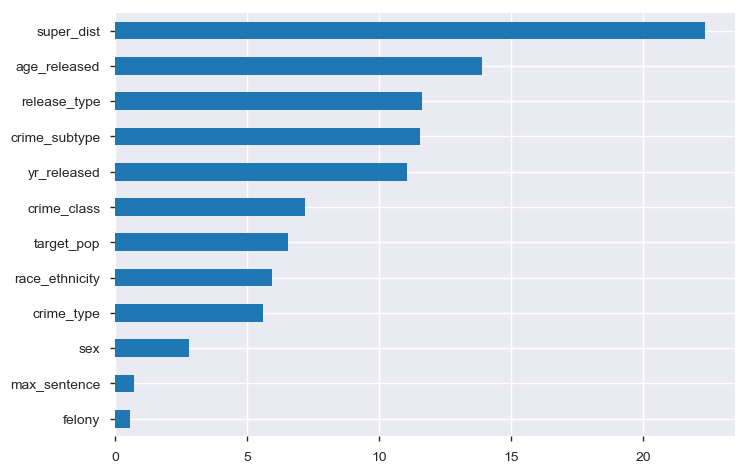

In [40]:
# Plotting Feature Importances
important_feature_names = cb_base.feature_names_
important_feature_scores = cb_base.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)
important_features.sort_values().plot(kind='barh')

#### Defining Roc_Auc Curve

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

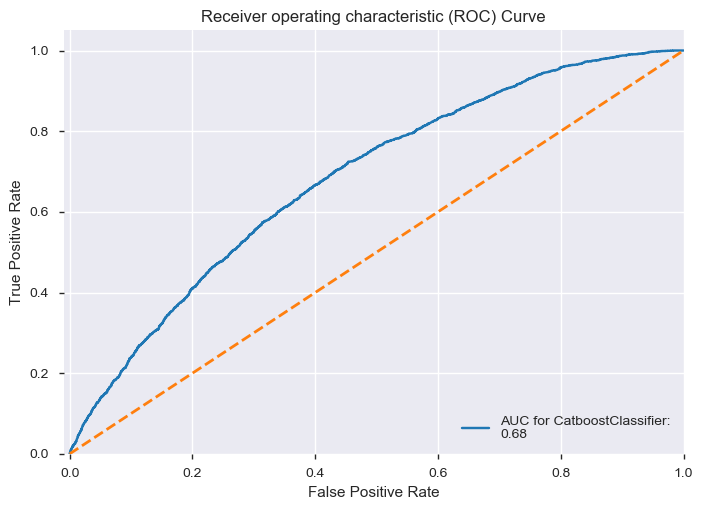

In [42]:
# Define plot_auc_roc_curve
def plot_auc_roc_curve(y_test, y_test_pred):
    
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, thresh  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot roc_auc_curve
y_test_pred = cb_base.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

Normalized confusion matrix
[[0.91612802 0.08387198]
 [0.79640719 0.20359281]]


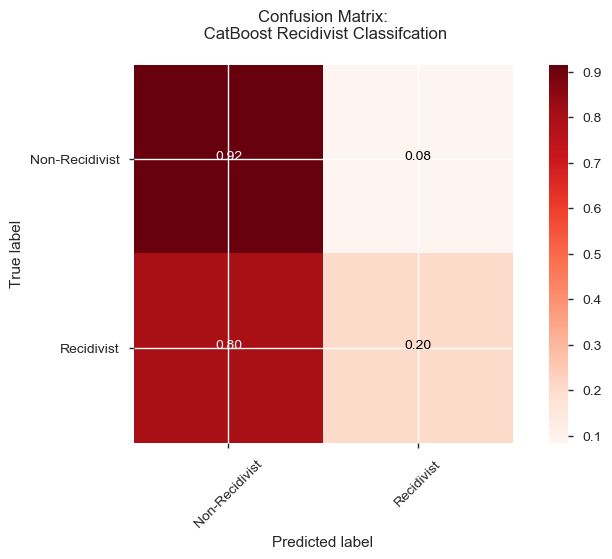

In [43]:
import itertools
from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_base.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Non-Recidivist', 'Recidivist'], normalize=True, cmap='Reds',
                      title='Confusion Matrix:\n CatBoost Recidivist Classifcation\n')

### Notes Following Initial Modeling:
- The ROC-AUC Curve Shows that our model performs better than chance. 
- HOWEVE, There is a major issue with our confusion matrix.
    - There are an extremely high # of False Negatives (prisoners Predicted to be "Non-Recidivist",but were actually "Recidivist")
    - This is a serious flaw with the model and serious hinders real-world applicability. 
- This may be due to the imbalance of cases of recidivists vs non-recidivists in our dataset.

# REVISING THE MODEL
## Balancing Target Classes Using Synthetic Minority Oversampling

In [ ]:
# # Define X and y 
# X = df_to_split
# y = pd.Series(df[target_col].to_numpy().ravel())
# y.name = 'recidivist'

In [ ]:
# df=pd.concat([y,X], axis=1)

In [ ]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

### Addressing the Imbalanced Class Issue
- Adding Synthetic Minority Oversampling Technique to balance out the # of recidivists(1) and non-recidivists(0)

In [44]:
from imblearn.over_sampling import SMOTE

print(pd.Series(y).value_counts())

X_resampled, y_resampled = SMOTE().fit_sample(X,y)

print(pd.Series(y_resampled).value_counts())

0    15880
1     8326
Name: recidivist, dtype: int64
1    15880
0    15880
dtype: int64


In [45]:
# Reformatting SMOTE transformed data

# X_resampled back to a dataframe
X_resampled = pd.DataFrame(X_resampled, columns = X.columns)

# X_resampled category columns back to integers
for header in category_cols:
    X_resampled[header] = X_resampled[header].astype('int')
    
# y_resampled back to a named series    
y_resampled = pd.Series(y_resampled)
y_resampled.name ='recidivist'

### Fitting a Revised Model with Balanced Classes

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

In [51]:
from catboost import Pool, CatBoostClassifier
train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [52]:
cb_clf = CatBoostClassifier(iterations=3000, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True,
                           task_type='GPU')


In [53]:
cb_clf.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=20)
cb_clf.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.48935036455053527, 'AUC': 0.8381498157978058},
 'validation_0': {'Logloss': 0.5304034254713083, 'AUC': 0.7904828786849976}}

_____________________________________________

## Visuals

In [54]:
# Plotting Feature Importances
important_feature_names = cb_clf.feature_names_
important_feature_scores = cb_clf.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)

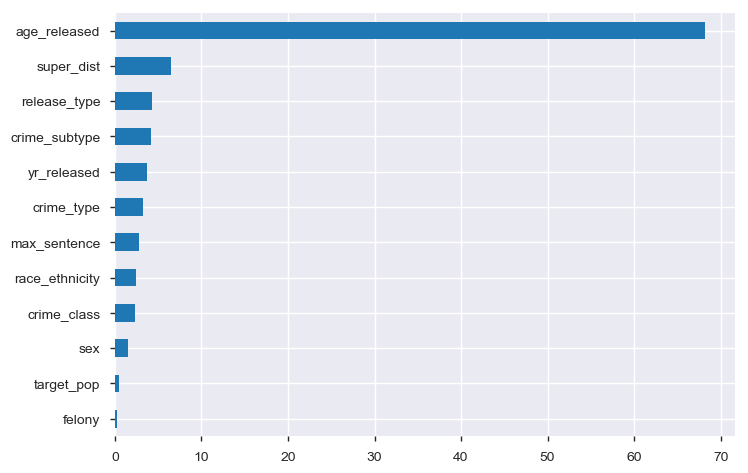

In [55]:
important_features.sort_values().plot(kind='barh')

### AUC-ROC Curve

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

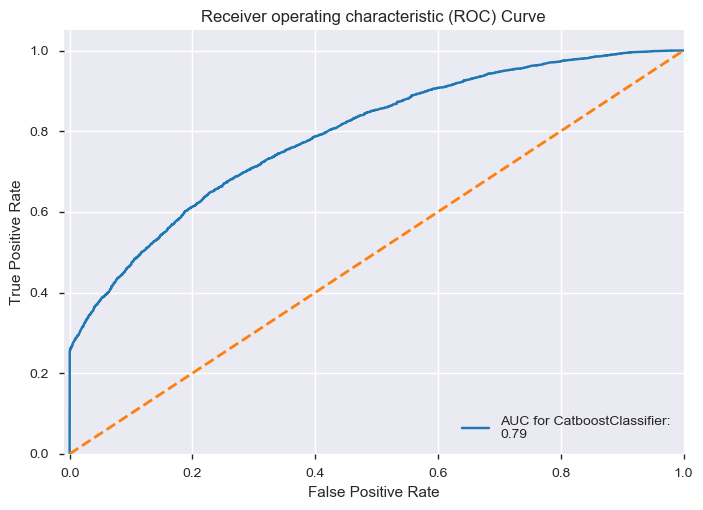

In [58]:
y_test_pred = cb_clf.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

### Confusion Matrix


Normalized confusion matrix
[[0.73313692 0.26686308]
 [0.31622702 0.68377298]]


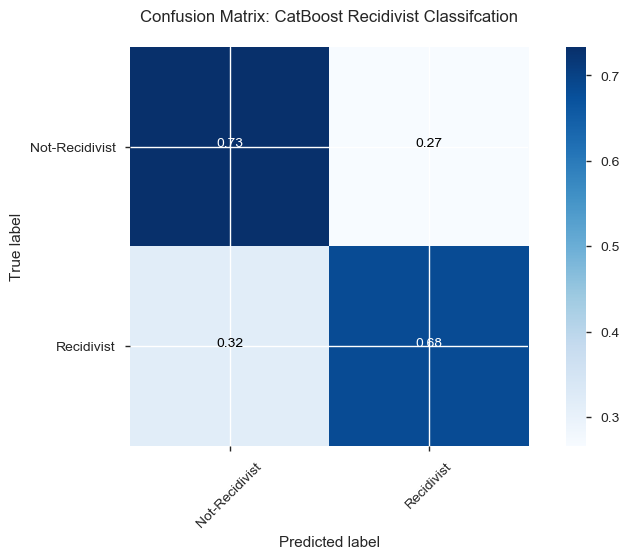

In [59]:
# import itertools
# from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Not-Recidivist', 'Recidivist'], normalize=True, cmap='Blues',
                      title='Confusion Matrix: CatBoost Recidivist Classifcation\n')

# CONCLUSIONS
- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.